In [254]:
import numpy as np
import os
from os.path import join
from skimage.transform import resize
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from matplotlib import pyplot as plt
import shutil

In [291]:
def plot_one_slice(array_3d, dim, idx, vmin=0, vmax=255, title=None):
    plt.figure(dpi=120)
    if dim=='x':  # shape of array_3d should be z,x,y
        plt.imshow(array_3d[:,idx,:], cmap='Greys', vmin=vmin, vmax=vmax)
    elif dim=='y':
        plt.imshow(array_3d[:,:,idx], cmap='Greys', vmin=vmin, vmax=vmax)
    elif dim=='z':
#         array_3d[array_3d<118]=0
        plt.imshow(array_3d[idx,:,:], cmap='Greys', vmin=vmin, vmax=vmax)
    plt.colorbar()
    plt.title(title)
    plt.show()

def plot_merged_slices(array_3d, dim, idx0, idx1, title=None, vmin=0, vmax=255):
    plt.figure(dpi=120)
    if dim=='x':  # shape of array_3d should be z,x,y
        to_show=np.max(array_3d[:,idx0:idx1,:], axis=1)
        plt.imshow(to_show, cmap='Greys', vmin=vmin, vmax=vmax)  # aspect=2
    elif dim=='y':
        plt.imshow(np.max(array_3d[:,:,idx0:idx1], axis=2), cmap='Greys', vmin=vmin, vmax=vmax)
    elif dim=='z':
#         array_3d[array_3d<118]=0
        plt.imshow(np.max(array_3d[idx0:idx1,:,:], axis=0), cmap='Greys', vmin=vmin, vmax=vmax)
    plt.colorbar()
    
    if title is not None:
        plt.title(title)
    plt.show()

def normalize_to(arr, min_value, max_value):
    arr = arr.astype(np.float32)
    arr -= arr.min()
    arr /= (arr.max() - arr.min())
    arr *= (max_value - min_value)
    arr += min_value
    return arr

In [441]:
num_crops = 0
num_gt_with_root = 0
num_incrop_with_root = 0

list_crop_loss = []
list_crop_path = []

sort_by_root_loss = True

list_root_perc = []
list_paths_contain_root = []

def search_dir_old(dir_base):
    is_leaf_dir = True
    for fn in os.listdir(dir_base):
        if os.path.isdir(join(dir_base, fn)):
            is_leaf_dir = False
            search_dir_old(join(dir_base, fn))

    if is_leaf_dir:
        for fn in os.listdir(dir_base):
            # if fn.startswith('in'):
            #     global num_crops
            #     num_crops += 1
            #     has_root = (np.load(join(dir_base, fn))['arr_0'].max() > 190)  # input crops that contains root?
            #     if has_root:
            #         global num_incrop_with_root
            #         num_incrop_with_root += 1
            #         print(join(dir_base, fn))
                    
            if fn.startswith('gt') and not (fn.endswith('padded_downsampled.npz')):
                global num_crops
                num_crops += 1
                # print(join(dir_base, fn))
                #rootperc = float(fn[:-4].split('_')[-1][8:])
                rootperc = float(fn.split('rootPerc')[-1][:-4].split('_')[0])  # gt_sand_unsat_0.23%wc_70x1x256x256_-1_rootPerc0.00000_time1568960005.npz
                # print('fn:', fn)
                # print('rootperc:', rootperc)
                # rootperc = (np.load(join(dir_base, fn))['arr_0'] > 0).sum()
            
                if rootperc > 0:
                    # print(join(dir_base, fn))
                    global num_gt_with_root
                    num_gt_with_root += 1
                    list_paths_contain_root.append(join(dir_base, fn))
                    list_root_perc.append(rootperc)

#                    # pad the gt to the same shape as input crop, and save as new file
#                    gt = np.load(join(dir_base, fn))['arr_0']
#                    assert gt.shape[0]==34
#                    pad_size = int((120-34)/2)
#                    gt_padded = np.pad(gt, ((pad_size,pad_size),(pad_size,pad_size),(pad_size,pad_size)), mode='constant', constant_values=gt.max())
#                    gt_downsampled = resize(gt_padded, (60,60,60), anti_aliasing=True)
#                    np.savez(join(dir_base, fn[:-4]+'padded_downsampled.npz'), gt_downsampled)

#             if fn.startswith('out'):
#                 global list_crop_loss
#                 global list_crop_path
#                 global sort_by_root_loss
#                 # print('filename:', fn)
#                 if sort_by_root_loss:  # only record the files with root in gt
#                     loss = float(''.join(fn[:-4].split('_')[-2][8:]))
#                     if loss>0:  # only when loss larger than 0 (it's almost impossible to have 0 loss if there's root)
#                         # print('root_loss', loss)
#                         list_crop_loss.append(loss)
#                         list_crop_path.append(join(dir_base, fn))
#                 else:
#                     loss = float(''.join(fn[:-4].split('_')[-1][8:]))  # models from 17_07_19 has the loss recording
#                     # print('soil_loss', loss)
#                     list_crop_loss.append(loss)
#                     list_crop_path.append(join(dir_base, fn))

                


search_dir_old('/home/user/zhaoy/local_dir/model_outputs_yi/3DUNet_noPadding_rw:x1.0_l2:0.0_lr:0.0001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:12_csl_60_apa_id_28_08_19_3DUNet_trainOnBothCombinedAndNonCombined_realSoilOnly_BNbeforeReLU_rootWeight1_fixedCropTrainVal_newDataLoading_newCombineParams/denoised_images/validation_results/Step_45000') #Step_72000

# print('num_crops', num_crops)
# print('num_gt_with_root', num_gt_with_root)
# print('num_incrop_with_root', num_incrop_with_root)

arr_crop_loss = np.array(list_crop_loss)
arr_crop_path = np.array(list_crop_path)
result_list = []
for i in arr_crop_path[np.argsort(arr_crop_loss)]:
    print(i)
    result_list.append(i)

arr_root_perc = np.array(list_root_perc)
arr_paths_contain_root = np.array(list_paths_contain_root)  
result_list_gt = []
for i in arr_paths_contain_root[np.argsort(arr_root_perc)]:
    print(i)
    result_list_gt.append(i)
    

/home/user/zhaoy/local_dir/model_outputs_yi/3DUNet_noPadding_rw:x1.0_l2:0.0_lr:0.0001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:12_csl_60_apa_id_28_08_19_3DUNet_trainOnBothCombinedAndNonCombined_realSoilOnly_BNbeforeReLU_rootWeight1_fixedCropTrainVal_newDataLoading_newCombineParams/denoised_images/validation_results/Step_45000/LupineApril2015/rad_0.34/rot_0/x_flip_0/y_flip_1/x_y_swap0/gt_g_0_rootPerc0.00003.npz
/home/user/zhaoy/local_dir/model_outputs_yi/3DUNet_noPadding_rw:x1.0_l2:0.0_lr:0.0001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:12_csl_60_apa_id_28_08_19_3DUNet_trainOnBothCombinedAndNonCombined_realSoilOnly_BNbeforeReLU_rootWeight1_fixedCropTrainVal_newDataLoading_newCombineParams/denoised_images/validation_results/Step_45000/lupine_small_xml/rad_1.00/rot_0/x_flip_1/y_flip_0/x_y_swap0/gt_d_3_rootPerc0.00003.npz
/home/user/zhaoy/local_dir/model_outputs_yi/3DUNet_noPadding_rw:x1.0_l2:0.0_lr:0.0001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:12_csl_60_apa_id_28_08_19_3DUNet_trainOnBothCombinedAndN

In [468]:
len(result_list_gt)

111

In [220]:
target_path = result_list[-2]

img = np.load(target_path)['arr_0']

@interact
def interactive_plot_x(dim=['x', 'y', 'z'], x=(0,max(img.shape),1)):
    plot_one_slice(img, dim, x)


interactive(children=(Dropdown(description='dim', options=('x', 'y', 'z'), value='x'), IntSlider(value=17, des…

## with new naming rule

In [612]:
num_crops = 0
num_gt_with_root = 0
num_incrop_with_root = 0

list_crop_loss = []
list_crop_path = []

sort_by_root_loss = True

list_root_perc = []
list_paths_contain_root = []

def search_dir(dir_base):
    is_leaf_dir = True
    for fn in os.listdir(dir_base):
        if os.path.isdir(join(dir_base, fn)):
            is_leaf_dir = False
            search_dir(join(dir_base, fn))

    if is_leaf_dir:
        for fn in os.listdir(dir_base):
            # if fn.startswith('in'):
            #     global num_crops
            #     num_crops += 1
            #     has_root = (np.load(join(dir_base, fn))['arr_0'].max() > 190)  # input crops that contains root?
            #     if has_root:
            #         global num_incrop_with_root
            #         num_incrop_with_root += 1
            #         print(join(dir_base, fn))
                    
            if fn.startswith('gt') and not (fn.endswith('padded_downsampled.npz')):
                global num_crops
                num_crops += 1
                #rootperc = float(fn[:-4].split('_')[-1][8:])
                rootperc = float(fn.split('rootPerc')[-1].split('_')[0])  # gt_sand_unsat_0.23%wc_70x1x256x256_-1_rootPerc0.00000_time1568960005.npz
                # rootperc = (np.load(join(dir_base, fn))['arr_0'] > 0).sum()
            
                if rootperc > 0:
                    # print(join(dir_base, fn))
                    global num_gt_with_root
                    num_gt_with_root += 1
                    list_paths_contain_root.append(join(dir_base, fn))
                    list_root_perc.append(rootperc)

#                     # pad the gt to the same shape as input crop, and save as new file
#                     gt = np.load(join(dir_base, fn))['arr_0']
#                     assert gt.shape[0]==34
#                     pad_size = int((120-34)/2)
#                     gt_padded = np.pad(gt, ((pad_size,pad_size),(pad_size,pad_size),(pad_size,pad_size)), mode='constant', constant_values=gt.max())
#                     gt_downsampled = resize(gt_padded, (60,60,60), anti_aliasing=True)
#                     np.savez(join(dir_base, fn[:-4]+'padded_downsampled.npz'), gt_downsampled)

#             if fn.startswith('out'):
#                 global list_crop_loss
#                 global list_crop_path
#                 global sort_by_root_loss
#                 # print('filename:', fn)
#                 if sort_by_root_loss:  # only record the files with root in gt
#                     identifier = fn.split('rootLoss')[0][len(target_type):]
#                     saving_timepoint = fn.split('_')[-1]
#                     for fn2 in os.listdir(dir_base):  # find the corresponding gt file
#                         if fn2.startswith('gt'+identifier) and fn2.endswith(saving_timepoint):
#                             gt_fn = fn2
#                             rootperc = float(gt_fn.split('rootPerc')[-1].split('_')[0])
#                             if rootperc>0:
#                                 loss = float(''.join(fn[:-4].split('_')[-3][8:]))
#                                 if loss>0:  # only when loss larger than 0 (it's almost impossible to have 0 loss if there's root)
#                                     # print('root_loss', loss)
#                                     list_crop_loss.append(loss)
#                                     list_crop_path.append(join(dir_base, fn))
#                 else:
#                     loss = float(''.join(fn[:-4].split('_')[-2][8:]))  # models from 17_07_19 has the loss recording
#                     # print('soil_loss', loss)
#                     list_crop_loss.append(loss)
#                     list_crop_path.append(join(dir_base, fn))

                

# 
# search_dir('/home/user/zhaoy/local_dir/model_outputs_yi/UNet_3D_noPadding_BNbeforeReLU_rw:x1.0_l2:0.0_lr:0.0001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:12_csl_60_apa_id_18_09_19_3DUNet_trainOnNilsDataset_combineWithAllRealSoil_rootWeight1_/denoised_images/validation_results/Step_42000')
search_dir('/home/user/zhaoy/local_dir/model_outputs_yi/UNet_3D_noPadding_BNbeforeReLU_smallerReceptiveField_rw:x1.0_l2:0.0_lr:0.0001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:12_mg_0.00_csl_60_apa_id_20_09_19_3DUNet_trainOnBothCombinedAndNonCombined_realSoilOnly_rootWeight1_fixedCropTrainVal_fewerConvLayers2/denoised_images/validation_results/Step_45000')
# search_dir('/home/user/zhaoy/local_dir/model_outputs_yi/UNet_3D_noPadding_BNbeforeReLU_smallerReceptiveField_rw:x1.0_l2:0.0_lr:0.0001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:12_mg_0.00_csl_60_apa_id_20_09_19_3DUNet_trainOnBothCombinedAndNonCombined_realSoilOnly_rootWeight1_fixedCropTrainVal_fewerConvLayers2/denoised_images/training_results')
# search_dir('/home/user/zhaoy/local_dir/model_outputs_yi/UNet_3D_noPadding_Nils_rw:x1.0_l2:0.0_lr:0.001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:100_mse_csl_32_apa_id_03_10_19_3DUNet_trainOnNilsDataset_copyNilsNetworkAndTraining4_fixTrainCrops/denoised_images/validation_results/Step_8700')
# search_dir('/home/user/zhaoy/local_dir/model_outputs_yi/UNet_3D_noPadding_Nils_rw:x1.0_l2:0.0_lr:0.001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:100_mse_csl_32_apa_id_03_10_19_3DUNet_trainOnNilsDataset_copyNilsNetworkAndTraining4_fixTrainCrops/denoised_images/training_results/Step_20200')
# search_dir('/home/user/zhaoy/local_dir/model_outputs_yi/UNet_3D_noPadding_BNbeforeReLU_rw:x1.0_l2:0.0_lr:0.0001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:12_csl_60_apa_id_12_09_19_3DUNet_trainOnBothCombined_realSoilOnly_rootWeight1_NotUseDiffTimePoints/denoised_images/validation_results/Step_48000')

# print('num_crops', num_crops)
# print('num_gt_with_root', num_gt_with_root)
# print('num_incrop_with_root', num_incrop_with_root)

arr_crop_loss = np.array(list_crop_loss)
arr_crop_path = np.array(list_crop_path)
result_list = []
for i in arr_crop_path[np.argsort(arr_crop_loss)]:
    print(i)
    result_list.append(i)

arr_root_perc = np.array(list_root_perc)
arr_paths_contain_root = np.array(list_paths_contain_root)  
result_list_gt = []
for i in arr_paths_contain_root[np.argsort(arr_root_perc)]:
    print(i)
    result_list_gt.append(i)


/home/user/zhaoy/local_dir/model_outputs_yi/UNet_3D_noPadding_BNbeforeReLU_smallerReceptiveField_rw:x1.0_l2:0.0_lr:0.0001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:12_mg_0.00_csl_60_apa_id_20_09_19_3DUNet_trainOnBothCombinedAndNonCombined_realSoilOnly_rootWeight1_fixedCropTrainVal_fewerConvLayers2/denoised_images/validation_results/Step_45000/gtk/rad_1.00/rot_60/x_flip_1/y_flip_0/x_y_swap0/gt__3_rootPerc0.00001_time1569150218.npz
/home/user/zhaoy/local_dir/model_outputs_yi/UNet_3D_noPadding_BNbeforeReLU_smallerReceptiveField_rw:x1.0_l2:0.0_lr:0.0001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:12_mg_0.00_csl_60_apa_id_20_09_19_3DUNet_trainOnBothCombinedAndNonCombined_realSoilOnly_rootWeight1_fixedCropTrainVal_fewerConvLayers2/denoised_images/validation_results/Step_45000/lupine_small_xml/rad_0.71/rot_120/x_flip_0/y_flip_1/x_y_swap1/gt__0_rootPerc0.00001_time1569150364.npz
/home/user/zhaoy/local_dir/model_outputs_yi/UNet_3D_noPadding_BNbeforeReLU_smallerReceptiveField_rw:x1.0_l2:0.0_lr:0.0001->0.01_

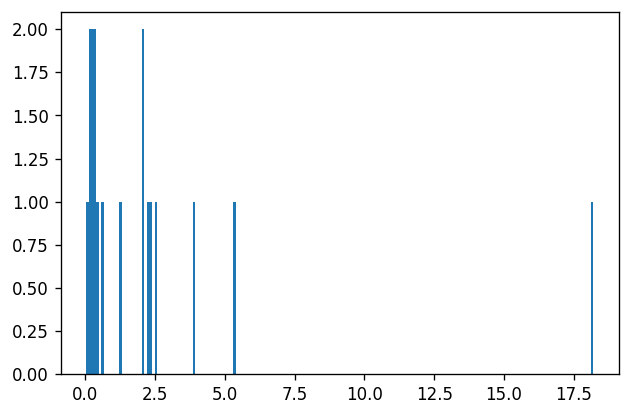

In [368]:
plt.figure(dpi=120)
plt.hist(arr_crop_loss, bins=200)
plt.show()

1.0


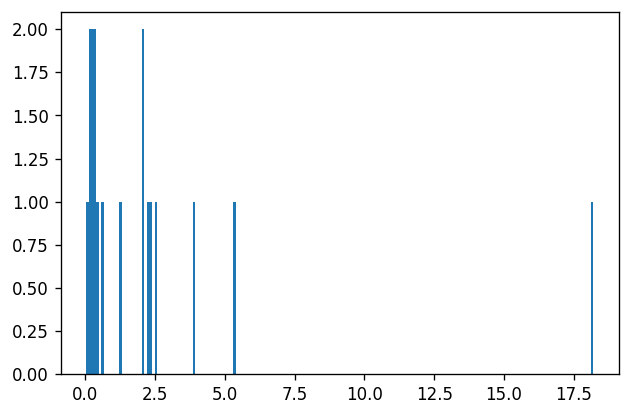

In [369]:
arr_crop_loss=np.array(arr_crop_loss)
print((arr_crop_loss>0.001).sum()/len(arr_crop_loss))
plt.figure(dpi=120)
plt.hist(arr_crop_loss, bins=200)
plt.show()

In [453]:
target_path

'/home/user/zhaoy/local_dir/model_outputs_yi/UNet_3D_noPadding_BNbeforeReLU_smallerReceptiveField_rw:x1.0_l2:0.0_lr:0.0001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:12_mg_0.00_csl_60_apa_id_20_09_19_3DUNet_trainOnBothCombinedAndNonCombined_realSoilOnly_rootWeight1_fixedCropTrainVal_fewerConvLayers2/denoised_images/validation_results/Step_45000/Lupine_22august/rad_1.41/rot_120/x_flip_0/y_flip_0/x_y_swap1/gt__3_rootPerc0.11789_time1569150280.npz'

In [491]:
# target_path = '/home/user/zhaoy/local_dir/model_outputs_yi/UNet_3D_noPadding_BNbeforeReLU_rw:x1.0_l2:0.0_lr:0.0001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:12_csl_60_apa_id_18_09_19_3DUNet_trainOnNilsDataset_combineWithAllRealSoil_rootWeight1_/denoised_images/validation_results/Step_42000/random_virtual_roots/Nils_dataset/fake_lupine_22_august/occupancy_small_alias_256x256x400.npy/rad_-1.00/rot_0/x_flip_0/y_flip_1/x_y_swap0/out_sand_unsat_0.18%wc_70x1x256x256_-1_rootLoss0.000000_soilLoss0.000006_time1568960044.npz'
# target_path = '/home/user/zhaoy/local_dir/model_outputs_yi/UNet_3D_noPadding_BNbeforeReLU_rw:x1.0_l2:0.0_lr:0.0001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:12_csl_60_apa_id_18_09_19_3DUNet_trainOnNilsDataset_combineWithAllRealSoil_rootWeight1_/denoised_images/validation_results/Step_42000/random_virtual_roots/Nils_dataset/fake_lupine_22_august/occupancy_small_alias_256x256x400.npy/rad_-1.00/rot_0/x_flip_0/y_flip_1/x_y_swap0/out_sand_d1_70x1x256x256_-1_rootLoss0.000000_soilLoss0.000004_time1568960024.npz'
# target_path = '/home/user/zhaoy/local_dir/model_outputs_yi/UNet_3D_noPadding_BNbeforeReLU_rw:x1.0_l2:0.0_lr:0.0001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:12_csl_60_apa_id_18_09_19_3DUNet_trainOnNilsDataset_combineWithAllRealSoil_rootWeight1_/denoised_images/validation_results/Step_42000/random_virtual_roots/Nils_dataset/fake_lupine_small/occupancy_small_alias_256x256x400.npy/rad_-1.00/rot_0/x_flip_1/y_flip_0/x_y_swap0/out_sand_unsat_0.18%wc_70x1x256x256_-1_rootLoss0.018135_soilLoss0.000009_time1568959956.npz'
# target_path = '/home/user/zhaoy/local_dir/model_outputs_yi/UNet_3D_noPadding_BNbeforeReLU_rw:x1.0_l2:0.0_lr:0.0001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:12_csl_60_apa_id_18_09_19_3DUNet_trainOnNilsDataset_combineWithAllRealSoil_rootWeight1_/denoised_images/validation_results/Step_42000/random_virtual_roots/Nils_dataset/fake_lupine_22_august/occupancy_small_alias_256x256x400.npy/rad_-1.00/rot_0/x_flip_1/y_flip_1/x_y_swap1/gt_sand_d1_70x1x256x256_-1_rootPerc0.00827_time1568960086.npz'
# target_path = '/home/user/zhaoy/local_dir/model_outputs_yi/UNet_3D_noPadding_Nils_rw:x1.0_l2:0.0_lr:0.001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:100_mse_csl_32_apa_id_03_10_19_3DUNet_trainOnNilsDataset_copyNilsNetworkAndTraining4_fixTrainCrops/denoised_images/validation_results/Step_8700/random_virtual_roots/Nils_dataset/fake_lupine_small/occupancy_small_alias_256x256x400.npy/rad_-1.00/rot_0/x_flip_0/y_flip_0/x_y_swap0/gt_sand_d2_70x1x256x256_-1_rootPerc0.01597_time1570199838.npz'

target_path = result_list_gt[-40]
# target_path = result_list[20]

target_dir = '/'.join(target_path.split('/')[:-1])
# print(os.listdir(target_dir)[:10])
saving_timepoint = target_path.split('_')[-1]
print('saving_timepoint:', saving_timepoint)

filename = target_path.strip('/').split('/')[-1]
target_type = filename.split('_')[0]  # in, out, or gt
print('target_type:', target_type)

if target_type=='out':
    identifier = filename.split('rootLoss')[0][len(target_type):]
elif target_type=='in':
    identifier = filename.split('noisiness')[0][len(target_type):]
elif target_type=='gt':
    identifier = filename.split('rootPerc')[0][len(target_type):]
print('identifier:', identifier)

for fn in os.listdir(target_dir):
    if fn.endswith(saving_timepoint):
        if fn.startswith('in'+identifier):
            print('input name:', fn)
            input_path = join(target_dir, fn)
        elif fn.startswith('out'+identifier):
            print('output name:', fn)
            output_path = join(target_dir, fn)
        elif fn.startswith('gt'+identifier):
            print('gt name:', fn)
            gt_path = join(target_dir, fn)

# input_path = '/home/user/zhaoy/local_dir/model_outputs_yi/UNet_3D_noPadding_Nils_rw:x1.0_l2:0.0_lr:0.001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:100_mse_csl_32_apa_id_03_10_19_3DUNet_trainOnNilsDataset_copyNilsNetworkAndTraining4_fixTrainCrops/denoised_images/validation_results/Step_8700/random_virtual_roots/Nils_dataset/fake_lupine_22_august/occupancy_small_alias_256x256x400.npy/rad_-1.00/rot_0/x_flip_1/y_flip_0/x_y_swap1/in_sand_sat_0.43%wc_70x1x256x256_-1_noisiness0.91_time1570199841.npz'
# output_path = '/home/user/zhaoy/local_dir/model_outputs_yi/UNet_3D_noPadding_Nils_rw:x1.0_l2:0.0_lr:0.001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:100_mse_csl_32_apa_id_03_10_19_3DUNet_trainOnNilsDataset_copyNilsNetworkAndTraining4_fixTrainCrops/denoised_images/validation_results/Step_8700/random_virtual_roots/Nils_dataset/fake_lupine_22_august/occupancy_small_alias_256x256x400.npy/rad_-1.00/rot_0/x_flip_1/y_flip_0/x_y_swap1/out_sand_sat_0.43%wc_70x1x256x256_-1_rootLoss18.069019_soilLoss163.242432_time1570199841.npz'
# gt_path = '/home/user/zhaoy/local_dir/model_outputs_yi/UNet_3D_noPadding_Nils_rw:x1.0_l2:0.0_lr:0.001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:100_mse_csl_32_apa_id_03_10_19_3DUNet_trainOnNilsDataset_copyNilsNetworkAndTraining4_fixTrainCrops/denoised_images/validation_results/Step_8700/random_virtual_roots/Nils_dataset/fake_lupine_22_august/occupancy_small_alias_256x256x400.npy/rad_-1.00/rot_0/x_flip_1/y_flip_0/x_y_swap1/gt_sand_sat_0.43%wc_70x1x256x256_-1_rootPerc0.03043_time1570199841.npz'

in_img = np.load(input_path)['arr_0']
out_img = np.load(output_path)['arr_0']
gt_img = np.load(gt_path)['arr_0']
print(in_img.shape)
print(out_img.shape)
print(gt_img.shape)

print('input_path:', input_path)
# print('output_path:', output_path)
# print('gt_path:', gt_path)

super_res = 2  # 2
shape_diff = in_img.shape[0]*super_res-out_img.shape[0]
shape_diff


saving_timepoint: time1568446589.npz
target_type: gt
identifier: _sand_d2_70x1x256x256_-1_
gt name: gt_sand_d2_70x1x256x256_-1_rootPerc0.01687_time1568446589.npz
input name: in_sand_d2_70x1x256x256_-1_noisiness0.98_time1568446589.npz
output name: out_sand_d2_70x1x256x256_-1_rootLoss0.000195_soilLoss0.000067_time1568446589.npz
(60, 60, 60)
(34, 34, 34)
(34, 34, 34)
input_path: /home/user/zhaoy/local_dir/model_outputs_yi/UNet_3D_noPadding_BNbeforeReLU_rw:x1.0_l2:0.0_lr:0.0001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:12_csl_60_apa_id_12_09_19_3DUNet_trainOnBothCombined_realSoilOnly_rootWeight1_NotUseDiffTimePoints/denoised_images/validation_results/Step_48000/random_virtual_roots/diff_time_points/903007/stopTime75.85%/occupancy_small_alias_256x256x200.npy/rad_-1.00/rot_0/x_flip_0/y_flip_0/x_y_swap1/in_sand_d2_70x1x256x256_-1_noisiness0.98_time1568446589.npz


86

In [487]:
in_img = normalize_to(in_img, 0, 255)

In [492]:
super_res = 2  # 2

@interact
def interactive_plot_x(dim=['x', 'y', 'z'], x=(0,max(in_img.shape),1)):
    plot_one_slice(in_img, dim, x)
    plot_one_slice(out_img, dim, x*super_res-shape_diff//2)
    #plot_one_slice(out_img, dim, x*super_res-shape_diff//2-1)
    plot_one_slice(gt_img, dim, x*super_res-shape_diff//2)
    #plot_one_slice(gt_img, dim, x*super_res-shape_diff//2-1)

interactive(children=(Dropdown(description='dim', options=('x', 'y', 'z'), value='x'), IntSlider(value=30, des…

In [608]:
super_res = 2  # 2
# directory = '/home/user/zhaoy/root_mri/temp/debug_out_dir/check_Dataloader_results/time_1570546232/inputName__cropPosition_182_126_348'
base_dir = '/home/user/zhaoy/root_mri/temp/debug_out_dir/check_Dataloader_results/time_1570624647/'
dir_list = os.listdir(base_dir)
directory = join(base_dir, dir_list[10])
in_img = np.load(join(directory, 'input.npz'))['arr_0']
in_img *= 255
gt_img = np.load(join(directory, 'gt.npz'))['arr_0']
gt_img *= 255

print('in_img.shape', in_img.shape)
print('in_img.max', in_img.max())
print('gt_img.shape', gt_img.shape)
print('gt_img.max', gt_img.max())
print('location of gt_img.max', np.where(gt_img==gt_img.max()))

# shape_diff = in_img.shape[0]*super_res-out_img.shape[0]

@interact
def interactive_plot_x(dim=['x', 'y', 'z'], x=(0,max(in_img.shape),1)):
    plot_one_slice(in_img, dim, x)
    #plot_one_slice(out_img, dim, x*super_res-shape_diff//2-1)
    plot_one_slice(gt_img, dim, x*super_res)
    #plot_one_slice(gt_img, dim, x*super_res-shape_diff//2-1)
    
# parse the params
with open(join(directory, 'return_dict.txt'), 'r') as f:
    for l in f.readlines():
        print(l)
        if l.strip("'").startswith("data_name"):
            data_name = l.strip().split(':')[-1].strip()
            # print(data_name)
        if l.strip("'").startswith("soil_data_path"):
            soil_data_path = l.strip().split(':')[-1].strip()
            print(soil_data_path)
        if l.strip("'").startswith("paddings_xyz"):
            paddings = l.strip().split(':')[-1].strip().strip('(').strip(')').split(',')
            for i in range(len(paddings)):
                paddings[i] = int(paddings[i].strip())
            print(paddings)
        if l.strip("'").startswith("soil_augment_params"):
            soil_augmentations = l.strip().split(':')[-1].strip().strip('(').strip(')').split(',')
            for i in range(len(soil_augmentations)):
                soil_augmentations[i] = int(soil_augmentations[i].strip())
            soil_xflip, soil_yflip, soil_xy_swap = soil_augmentations
            print(soil_augmentations)
        if l.strip("'").startswith("soil_crop_start_position"):
            soil_crop_start_position = l.strip().split(':')[-1].strip().strip('(').strip(')').split(',')
            for i in range(len(soil_crop_start_position)):
                soil_crop_start_position[i] = int(soil_crop_start_position[i].strip())
            soil_crop_start_x, soil_crop_start_y, soil_crop_start_z = soil_crop_start_position
            print(soil_crop_start_position)
        if l.strip("'").startswith("x_flip"):
            root_xflip = int(l.strip().split(':')[-1].strip())
            print(root_xflip)
        if l.strip("'").startswith("y_flip"):
            root_yflip = int(l.strip().split(':')[-1].strip())
            print(root_yflip)
        if l.strip("'").startswith("x_y_swap"):
            root_xy_swap = int(l.strip().split(':')[-1].strip())
            print(root_xy_swap)
        if l.strip("'").startswith("input_start_x"):
            root_crop_start_x = int(l.strip().split(':')[-1].strip())
            print(root_crop_start_x)
        if l.strip("'").startswith("input_start_y"):
            root_crop_start_y = int(l.strip().split(':')[-1].strip())
            print(root_crop_start_y)
        if l.strip("'").startswith("input_start_z"):
            root_crop_start_z = int(l.strip().split(':')[-1].strip())
            print(root_crop_start_z)
        if l.strip("'").startswith("random_scaling_factor"):
            random_scaling_factor = float(l.strip().split(':')[-1].strip().strip('[').strip(']'))
            print(random_scaling_factor)
            

in_img.shape (60, 60, 60)
in_img.max 247.33249
gt_img.shape (120, 120, 120)
gt_img.max 255.0
location of gt_img.max (array([ 0,  0,  0, ..., 33, 33, 33]), array([ 51,  51,  51, ..., 102, 103, 104]), array([73, 74, 75, ...,  0,  0,  0]))


interactive(children=(Dropdown(description='dim', options=('x', 'y', 'z'), value='x'), IntSlider(value=30, des…

'paddings_xyz': (43, 43, 43)

[43, 43, 43]
'soil_crop_start_position': (63, 76, 5)

[63, 76, 5]
'soil_augment_params': (0, 0, 0)

[0, 0, 0]
'random_scaling_factor': [0.9861181]

0.9861181
'ground_truth_path': /home/user/zhaoy/local_dir/data/random_virtual_roots/Nils_dataset/fake_lupine_22_august/ground_truth_res_2x.npy

'occupancy_path': 

'weight': -1

'radius': -1.0

'rotation': 0

'x_flip': 1

1
'y_flip': 1

1
'x_y_swap': 0

0
'noise_type': sand_unsat_0.34%wc_70x1x256x256

'data_index': -1

'data_name': random_virtual_roots/Nils_dataset/fake_lupine_22_august/occupancy_small_alias_256x256x400.npy

'slice_count': 400

'width': 256

'height': 256

'real_data': False

'img_path': 

'root_weight_map': 1.0

'snr': 0.0

'dont_care_mask': []

'root_perc': 0.0012563657407407408

'out_start_xyz': -1

'base_weight_path': 

'soil_data_path': /home/user/zhaoy/local_dir/data/pure_soil/real_soil_noise/sand_unsat_0.34%wc_70x1x256x256_uint8.npy

/home/user/zhaoy/local_dir/data/pure_soil/real_soil_no

In [609]:
# reproduce the crops from the recorded parameters and compare with the saved crops
def augment_data(data, x_flip, y_flip, x_y_swap):
    assert len(data.shape) == 4 and data.shape[1] == 1  # data should be of the shape (z,1,x,y)
    if int(x_flip) == 1:
        data = np.flip(data, axis=2)
    if int(y_flip) == 1:
        data = np.flip(data, axis=3)
    if int(x_y_swap) == 1:
        data = np.swapaxes(data, 2, 3)

    return data

input_dir = '/home/user/zhaoy/local_dir/data'
corresponding_whole_input = np.load(join(input_dir, data_name))
print(corresponding_whole_input.shape)
corresponding_whole_input = np.expand_dims(corresponding_whole_input, 1)
corresponding_whole_input = augment_data(corresponding_whole_input, root_xflip, root_yflip, root_xy_swap)
corresponding_whole_input = corresponding_whole_input* random_scaling_factor
padding = paddings[0]
corresponding_whole_input = np.pad(corresponding_whole_input, ((padding//2, padding-padding//2),
                                                               (0,0),
                                                               (padding//2, padding-padding//2),
                                                               (padding//2, padding-padding//2)))
corresponding_whole_input = np.squeeze(corresponding_whole_input)
cut_input = corresponding_whole_input[root_crop_start_z:root_crop_start_z+in_img.shape[0], 
                                      root_crop_start_x:root_crop_start_x+in_img.shape[1], 
                                      root_crop_start_y:root_crop_start_y+in_img.shape[2]]
print('cut_input.max:', cut_input.max())
print('root crop position xyz:', root_crop_start_x, root_crop_start_y, root_crop_start_z)

if super_res==1:
    corresponding_whole_gt = np.load(join(input_dir, data_name.replace('alias', 'antialias')[:-4]+'_notThresholded.npy'))
else:
    corresponding_whole_gt = np.load(join(input_dir, data_name.replace('occupancy_small_alias_256x256x400.npy', 'ground_truth_res_2x.npy')))

print(corresponding_whole_gt.shape)
corresponding_whole_gt = np.expand_dims(corresponding_whole_gt, 1)
corresponding_whole_gt = augment_data(corresponding_whole_gt, root_xflip, root_yflip, root_xy_swap)
corresponding_whole_gt = np.pad(corresponding_whole_gt, ((padding//2*super_res, (padding-padding//2)*super_res),
                                                           (0,0),
                                                           (padding//2*super_res, (padding-padding//2)*super_res),
                                                           (padding//2*super_res, (padding-padding//2)*super_res)))
print('corresponding_whole_gt.shape after padding:', corresponding_whole_gt.shape)

corresponding_whole_gt = np.squeeze(corresponding_whole_gt)
cut_gt = corresponding_whole_gt[(root_crop_start_z)*super_res:(root_crop_start_z+in_img.shape[0])*super_res, 
                                  (root_crop_start_x)*super_res:(root_crop_start_x+in_img.shape[1])*super_res, 
                                  (root_crop_start_y)*super_res:(root_crop_start_y+in_img.shape[2])*super_res]


whole_soil = np.load(soil_data_path)
print(whole_soil.shape)
whole_soil = augment_data(whole_soil, soil_xflip, soil_yflip, soil_xy_swap)
# whole_soil = whole_soil * random_scaling_factor

whole_soil = np.squeeze(whole_soil)
cut_soil = whole_soil[soil_crop_start_z:soil_crop_start_z+in_img.shape[0], 
                                      soil_crop_start_x:soil_crop_start_x+in_img.shape[1],
                                      soil_crop_start_y:soil_crop_start_y+in_img.shape[2]]
print('cut_soil.max:', cut_soil.max())
print('soil crop position xyz:', soil_crop_start_x, soil_crop_start_y, soil_crop_start_z)

@interact
def interactive_plot_x(dim=['x', 'y', 'z'], x=(0,max(cut_input.shape),1)):
    plot_one_slice(cut_input, dim, x)
    plot_one_slice(cut_gt, dim, x*super_res)    
    plot_one_slice(cut_soil, dim, x)

@interact
def interactive_plot_x(dim=['x', 'y', 'z'], x=(0,max(whole_soil.shape),1)):
    plot_one_slice(whole_soil, dim, x)



(400, 256, 256)
cut_input.max: 251.4601155
root crop position xyz: 61 77 171
(800, 512, 512)
corresponding_whole_gt.shape after padding: (886, 1, 598, 598)
(70, 1, 256, 256)
cut_soil.max: 242
soil crop position xyz: 63 76 5


interactive(children=(Dropdown(description='dim', options=('x', 'y', 'z'), value='x'), IntSlider(value=30, des…

interactive(children=(Dropdown(description='dim', options=('x', 'y', 'z'), value='x'), IntSlider(value=128, de…

In [589]:
np.where(cut_gt==cut_gt.max())

(array([ 55,  55,  55, ..., 119, 119, 119]),
 array([77, 78, 79, ..., 67, 67, 67]),
 array([119, 119, 119, ...,  44,  45,  46]))

In [591]:
cut_gt.max()

255

In [348]:
gt_img.max()

0

In [184]:
gt_path

'/home/user/zhaoy/local_dir/model_outputs_yi/UNet_3D_noPadding_BNbeforeReLU_smallerReceptiveField_rw:x1.0_l2:0.0_lr:0.0001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:12_mg_0.00_csl_60_apa_id_20_09_19_3DUNet_trainOnBothCombinedAndNonCombined_realSoilOnly_rootWeight1_fixedCropTrainVal_fewerConvLayers2/denoised_images/validation_results/Step_45000/Lupine_22august/rad_1.00/rot_120/x_flip_0/y_flip_0/x_y_swap0/gt__4_rootPerc0.00000_time1569150359.npz'

In [185]:
input_path

'/home/user/zhaoy/local_dir/model_outputs_yi/UNet_3D_noPadding_BNbeforeReLU_smallerReceptiveField_rw:x1.0_l2:0.0_lr:0.0001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:12_mg_0.00_csl_60_apa_id_20_09_19_3DUNet_trainOnBothCombinedAndNonCombined_realSoilOnly_rootWeight1_fixedCropTrainVal_fewerConvLayers2/denoised_images/validation_results/Step_45000/Lupine_22august/rad_1.00/rot_120/x_flip_0/y_flip_0/x_y_swap0/in__4_noisiness0.72_time1569150359.npz'

In [186]:
output_path

'/home/user/zhaoy/local_dir/model_outputs_yi/UNet_3D_noPadding_BNbeforeReLU_smallerReceptiveField_rw:x1.0_l2:0.0_lr:0.0001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:12_mg_0.00_csl_60_apa_id_20_09_19_3DUNet_trainOnBothCombinedAndNonCombined_realSoilOnly_rootWeight1_fixedCropTrainVal_fewerConvLayers2/denoised_images/validation_results/Step_45000/Lupine_22august/rad_1.00/rot_120/x_flip_0/y_flip_0/x_y_swap0/out__4_rootLoss0.000000_soilLoss0.001709_time1569150359.npz'

In [42]:
result_list[-3]

'/home/user/zhaoy/local_dir/model_outputs_yi/UNet_3D_noPadding_BNbeforeReLU_rw:x1.0_l2:0.0_lr:0.0001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:12_csl_60_apa_id_18_09_19_3DUNet_trainOnNilsDataset_combineWithAllRealSoil_rootWeight1_/denoised_images/validation_results/Step_42000/random_virtual_roots/Nils_dataset/fake_lupine_small/occupancy_small_alias_256x256x400.npy/rad_-1.00/rot_0/x_flip_1/y_flip_0/x_y_swap0/out_sand_unsat_0.23%wc_70x1x256x256_-1_rootLoss0.005450_soilLoss0.000019_time1568959956.npz'

Input crops which has a very low intensity and high root loss:
['/home/user/zhaoy/local_dir/model_outputs_yi/UNet_3D_noPadding_BNbeforeReLU_rw:x1.0_l2:0.0_lr:0.0001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:12_csl_60_apa_id_18_09_19_3DUNet_trainOnNilsDataset_combineWithAllRealSoil_rootWeight1_/denoised_images/validation_results/Step_42000/random_virtual_roots/Nils_dataset/fake_lupine_22_august/occupancy_small_alias_256x256x400.npy/rad_-1.00/rot_0/x_flip_0/y_flip_1/x_y_swap1/in_sand_unsat_0.34%wc_70x1x256x256_-1_noisiness0.87_time1568960018.npz',
'/home/user/zhaoy/local_dir/model_outputs_yi/UNet_3D_noPadding_BNbeforeReLU_rw:x1.0_l2:0.0_lr:0.0001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:12_csl_60_apa_id_18_09_19_3DUNet_trainOnNilsDataset_combineWithAllRealSoil_rootWeight1_/denoised_images/validation_results/Step_42000/random_virtual_roots/Nils_dataset/fake_lupine_small/occupancy_small_alias_256x256x400.npy/rad_-1.00/rot_0/x_flip_1/y_flip_0/x_y_swap0/in_sand_unsat_0.18%wc_70x1x256x256_-1_noisiness0.97_time1568959956.npz',
'/home/user/zhaoy/local_dir/model_outputs_yi/UNet_3D_noPadding_BNbeforeReLU_rw:x1.0_l2:0.0_lr:0.0001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:12_csl_60_apa_id_18_09_19_3DUNet_trainOnNilsDataset_combineWithAllRealSoil_rootWeight1_/denoised_images/validation_results/Step_42000/random_virtual_roots/Nils_dataset/fake_lupine_small/occupancy_small_alias_256x256x400.npy/rad_-1.00/rot_0/x_flip_1/y_flip_0/x_y_swap0/in_sand_unsat_0.23%wc_70x1x256x256_-1_noisiness0.98_time1568959956.npz',
'/home/user/zhaoy/local_dir/model_outputs_yi/UNet_3D_noPadding_BNbeforeReLU_rw:x1.0_l2:0.0_lr:0.0001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:12_csl_60_apa_id_18_09_19_3DUNet_trainOnNilsDataset_combineWithAllRealSoil_rootWeight1_/denoised_images/validation_results/Step_42000/random_virtual_roots/Nils_dataset/fake_lupine_22_august/occupancy_small_alias_256x256x400.npy/rad_-1.00/rot_0/x_flip_1/y_flip_1/x_y_swap0/in_sand_unsat_0.23%wc_70x1x256x256_-1_noisiness0.88_time1568959949.npz',
'/home/user/zhaoy/local_dir/model_outputs_yi/UNet_3D_noPadding_BNbeforeReLU_rw:x1.0_l2:0.0_lr:0.0001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:12_csl_60_apa_id_18_09_19_3DUNet_trainOnNilsDataset_combineWithAllRealSoil_rootWeight1_/denoised_images/validation_results/Step_42000/random_virtual_roots/Nils_dataset/fake_lupine_small/occupancy_small_alias_256x256x400.npy/rad_-1.00/rot_0/x_flip_1/y_flip_0/x_y_swap0/in_sand_sat_0.43%wc_70x1x256x256_-1_noisiness0.91_time1568960088.npz',
'/home/user/zhaoy/local_dir/model_outputs_yi/UNet_3D_noPadding_BNbeforeReLU_rw:x1.0_l2:0.0_lr:0.0001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:12_csl_60_apa_id_18_09_19_3DUNet_trainOnNilsDataset_combineWithAllRealSoil_rootWeight1_/denoised_images/validation_results/Step_42000/random_virtual_roots/Nils_dataset/fake_lupine_22_august/occupancy_small_alias_256x256x400.npy/rad_-1.00/rot_0/x_flip_1/y_flip_1/x_y_swap0/in_sand_unsat_0.27%wc_70x1x256x256_-1_noisiness0.99_time1568959982.npz',
'/home/user/zhaoy/local_dir/model_outputs_yi/UNet_3D_noPadding_BNbeforeReLU_rw:x1.0_l2:0.0_lr:0.0001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:12_csl_60_apa_id_18_09_19_3DUNet_trainOnNilsDataset_combineWithAllRealSoil_rootWeight1_/denoised_images/validation_results/Step_42000/random_virtual_roots/Nils_dataset/fake_lupine_small/occupancy_small_alias_256x256x400.npy/rad_-1.00/rot_0/x_flip_0/y_flip_0/x_y_swap1/in_sand_unsat_0.23%wc_70x1x256x256_-1_noisiness0.95_time1568959980.npz',
'/home/user/zhaoy/local_dir/model_outputs_yi/UNet_3D_noPadding_BNbeforeReLU_rw:x1.0_l2:0.0_lr:0.0001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:12_csl_60_apa_id_18_09_19_3DUNet_trainOnNilsDataset_combineWithAllRealSoil_rootWeight1_/denoised_images/validation_results/Step_42000/random_virtual_roots/Nils_dataset/fake_lupine_small/occupancy_small_alias_256x256x400.npy/rad_-1.00/rot_0/x_flip_1/y_flip_0/x_y_swap0/in_sand_d1_70x1x256x256_-1_noisiness0.95_time1568959946.npz',
'/home/user/zhaoy/local_dir/model_outputs_yi/UNet_3D_noPadding_BNbeforeReLU_rw:x1.0_l2:0.0_lr:0.0001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:12_csl_60_apa_id_18_09_19_3DUNet_trainOnNilsDataset_combineWithAllRealSoil_rootWeight1_/denoised_images/validation_results/Step_42000/random_virtual_roots/Nils_dataset/fake_lupine_small/occupancy_small_alias_256x256x400.npy/rad_-1.00/rot_0/x_flip_0/y_flip_0/x_y_swap1/in_sand_d1_70x1x256x256_-1_noisiness0.98_time1568959953.npz']

In [253]:
list_crops_low_intensity_high_root_loss = \
['/home/user/zhaoy/local_dir/model_outputs_yi/UNet_3D_noPadding_BNbeforeReLU_rw:x1.0_l2:0.0_lr:0.0001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:12_csl_60_apa_id_18_09_19_3DUNet_trainOnNilsDataset_combineWithAllRealSoil_rootWeight1_/denoised_images/validation_results/Step_42000/random_virtual_roots/Nils_dataset/fake_lupine_22_august/occupancy_small_alias_256x256x400.npy/rad_-1.00/rot_0/x_flip_0/y_flip_1/x_y_swap1/in_sand_unsat_0.34%wc_70x1x256x256_-1_noisiness0.87_time1568960018.npz',
'/home/user/zhaoy/local_dir/model_outputs_yi/UNet_3D_noPadding_BNbeforeReLU_rw:x1.0_l2:0.0_lr:0.0001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:12_csl_60_apa_id_18_09_19_3DUNet_trainOnNilsDataset_combineWithAllRealSoil_rootWeight1_/denoised_images/validation_results/Step_42000/random_virtual_roots/Nils_dataset/fake_lupine_small/occupancy_small_alias_256x256x400.npy/rad_-1.00/rot_0/x_flip_1/y_flip_0/x_y_swap0/in_sand_unsat_0.18%wc_70x1x256x256_-1_noisiness0.97_time1568959956.npz',
'/home/user/zhaoy/local_dir/model_outputs_yi/UNet_3D_noPadding_BNbeforeReLU_rw:x1.0_l2:0.0_lr:0.0001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:12_csl_60_apa_id_18_09_19_3DUNet_trainOnNilsDataset_combineWithAllRealSoil_rootWeight1_/denoised_images/validation_results/Step_42000/random_virtual_roots/Nils_dataset/fake_lupine_small/occupancy_small_alias_256x256x400.npy/rad_-1.00/rot_0/x_flip_1/y_flip_0/x_y_swap0/in_sand_unsat_0.23%wc_70x1x256x256_-1_noisiness0.98_time1568959956.npz',
'/home/user/zhaoy/local_dir/model_outputs_yi/UNet_3D_noPadding_BNbeforeReLU_rw:x1.0_l2:0.0_lr:0.0001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:12_csl_60_apa_id_18_09_19_3DUNet_trainOnNilsDataset_combineWithAllRealSoil_rootWeight1_/denoised_images/validation_results/Step_42000/random_virtual_roots/Nils_dataset/fake_lupine_22_august/occupancy_small_alias_256x256x400.npy/rad_-1.00/rot_0/x_flip_1/y_flip_1/x_y_swap0/in_sand_unsat_0.23%wc_70x1x256x256_-1_noisiness0.88_time1568959949.npz',
'/home/user/zhaoy/local_dir/model_outputs_yi/UNet_3D_noPadding_BNbeforeReLU_rw:x1.0_l2:0.0_lr:0.0001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:12_csl_60_apa_id_18_09_19_3DUNet_trainOnNilsDataset_combineWithAllRealSoil_rootWeight1_/denoised_images/validation_results/Step_42000/random_virtual_roots/Nils_dataset/fake_lupine_small/occupancy_small_alias_256x256x400.npy/rad_-1.00/rot_0/x_flip_1/y_flip_0/x_y_swap0/in_sand_sat_0.43%wc_70x1x256x256_-1_noisiness0.91_time1568960088.npz',
'/home/user/zhaoy/local_dir/model_outputs_yi/UNet_3D_noPadding_BNbeforeReLU_rw:x1.0_l2:0.0_lr:0.0001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:12_csl_60_apa_id_18_09_19_3DUNet_trainOnNilsDataset_combineWithAllRealSoil_rootWeight1_/denoised_images/validation_results/Step_42000/random_virtual_roots/Nils_dataset/fake_lupine_22_august/occupancy_small_alias_256x256x400.npy/rad_-1.00/rot_0/x_flip_1/y_flip_1/x_y_swap0/in_sand_unsat_0.27%wc_70x1x256x256_-1_noisiness0.99_time1568959982.npz',
'/home/user/zhaoy/local_dir/model_outputs_yi/UNet_3D_noPadding_BNbeforeReLU_rw:x1.0_l2:0.0_lr:0.0001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:12_csl_60_apa_id_18_09_19_3DUNet_trainOnNilsDataset_combineWithAllRealSoil_rootWeight1_/denoised_images/validation_results/Step_42000/random_virtual_roots/Nils_dataset/fake_lupine_small/occupancy_small_alias_256x256x400.npy/rad_-1.00/rot_0/x_flip_0/y_flip_0/x_y_swap1/in_sand_unsat_0.23%wc_70x1x256x256_-1_noisiness0.95_time1568959980.npz',
'/home/user/zhaoy/local_dir/model_outputs_yi/UNet_3D_noPadding_BNbeforeReLU_rw:x1.0_l2:0.0_lr:0.0001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:12_csl_60_apa_id_18_09_19_3DUNet_trainOnNilsDataset_combineWithAllRealSoil_rootWeight1_/denoised_images/validation_results/Step_42000/random_virtual_roots/Nils_dataset/fake_lupine_small/occupancy_small_alias_256x256x400.npy/rad_-1.00/rot_0/x_flip_1/y_flip_0/x_y_swap0/in_sand_d1_70x1x256x256_-1_noisiness0.95_time1568959946.npz',
'/home/user/zhaoy/local_dir/model_outputs_yi/UNet_3D_noPadding_BNbeforeReLU_rw:x1.0_l2:0.0_lr:0.0001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:12_csl_60_apa_id_18_09_19_3DUNet_trainOnNilsDataset_combineWithAllRealSoil_rootWeight1_/denoised_images/validation_results/Step_42000/random_virtual_roots/Nils_dataset/fake_lupine_small/occupancy_small_alias_256x256x400.npy/rad_-1.00/rot_0/x_flip_0/y_flip_0/x_y_swap1/in_sand_d1_70x1x256x256_-1_noisiness0.98_time1568959953.npz']

In [272]:
# copy the test crops to target directory
target_dir2 = '/home/user/zhaoy/root_mri/experiments/crops_low_intensity_high_root_loss'
for crop in list_crops_low_intensity_high_root_loss:
    crop_fn = crop.strip('/').split('/')[-1]
    shutil.copyfile(crop, join(target_dir2, crop_fn))

In [274]:
# convert npz to npy for inputing to network
for c in os.listdir(target_dir2):
    if c.endswith('.npz'):
        print(c)
        arr=np.load(join(target_dir2, c))['arr_0']
        np.save(join(target_dir2, c[:-1]+'y'), arr)
        os.remove(join(target_dir2, c))
#         print(.shape)
#         break
        

### compare the results of normalized input crops and not normalized ones

In [316]:
input_dir = '/home/user/zhaoy/root_mri/experiments/crops_low_intensity_high_root_loss'
# data_name = 'in_sand_unsat_0.34%wc_70x1x256x256_-1_noisiness0.87_time1568960018.npy'
# data_name = 'in_sand_sat_0.43%wc_70x1x256x256_-1_noisiness0.91_time1568960088.npy'
# data_name = 'in_sand_d1_70x1x256x256_-1_noisiness0.98_time1568959953.npy'
data_name = 'in_sand_unsat_0.23%wc_70x1x256x256_-1_noisiness0.88_time1568959949.npy'
# data_name = 'in_sand_d1_70x1x256x256_-1_noisiness0.95_time1568959946.npy'
# data_name = 'in_sand_unsat_0.23%wc_70x1x256x256_-1_noisiness0.95_time1568959980.npy'
# data_name = 'in_sand_unsat_0.23%wc_70x1x256x256_-1_noisiness0.98_time1568959956.npy'
# data_name = 'in_sand_unsat_0.27%wc_70x1x256x256_-1_noisiness0.99_time1568959982.npy'
# data_name = 'in_sand_unsat_0.18%wc_70x1x256x256_-1_noisiness0.97_time1568959956.npy'

normalized_output_dir = '/home/user/zhaoy/root_mri/experiments/crops_low_intensity_high_root_loss/seg_results_normalizeInput/UNet_3D_noPadding_BNbeforeReLU_rw:x1.0_l2:0.0_lr:0.0001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:12_csl_60_apa_id_18_09_19_3DUNet_trainOnNilsDataset_combineWithAllRealSoil_rootWeight1_'
output_dir = '/home/user/zhaoy/root_mri/experiments/crops_low_intensity_high_root_loss/seg_results/UNet_3D_noPadding_BNbeforeReLU_rw:x1.0_l2:0.0_lr:0.0001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:12_csl_60_apa_id_18_09_19_3DUNet_trainOnNilsDataset_combineWithAllRealSoil_rootWeight1_'
in_img = np.load(join(input_dir, data_name))
out_img_normalized = np.load(join(normalized_output_dir, 'visualized_out_'+data_name[:-1]+'z'))['arr_0']
out_img0 = np.load(join(output_dir, 'visualized_out_'+data_name[:-1]+'z'))['arr_0']
print(out_img_normalized.shape)
print(out_img0.shape)
shape_diff = in_img.shape[0]*2-out_img0.shape[0]
print(shape_diff)

@interact
def interactive_plot_x(dim=['x', 'y', 'z'], x=(0,max(in_img.shape),1)):
    plot_one_slice(in_img, dim, x, title='input')
    plot_one_slice(out_img_normalized, dim, x*2-shape_diff//2, title='output from normalized input')
    #plot_one_slice(out_img, dim, x*2-shape_diff//2-1)
    plot_one_slice(out_img0, dim, x*2-shape_diff//2, title='output')
    #plot_one_slice(gt_img, dim, x*2-shape_diff//2-1)

(34, 34, 34)
(34, 34, 34)
86


interactive(children=(Dropdown(description='dim', options=('x', 'y', 'z'), value='x'), IntSlider(value=30, des…

In [275]:
input_dir = '/home/user/zhaoy/root_mri/experiments/crops_low_intensity_high_root_loss'
for fn in os.listdir(input_dir):
    print(fn)

seg_results_normalizeInput
in_sand_unsat_0.34%wc_70x1x256x256_-1_noisiness0.87_time1568960018.npy
in_sand_sat_0.43%wc_70x1x256x256_-1_noisiness0.91_time1568960088.npy
in_sand_d1_70x1x256x256_-1_noisiness0.98_time1568959953.npy
in_sand_unsat_0.23%wc_70x1x256x256_-1_noisiness0.88_time1568959949.npy
in_sand_d1_70x1x256x256_-1_noisiness0.95_time1568959946.npy
in_sand_unsat_0.23%wc_70x1x256x256_-1_noisiness0.95_time1568959980.npy
in_sand_unsat_0.23%wc_70x1x256x256_-1_noisiness0.98_time1568959956.npy
in_sand_unsat_0.27%wc_70x1x256x256_-1_noisiness0.99_time1568959982.npy
in_sand_unsat_0.18%wc_70x1x256x256_-1_noisiness0.97_time1568959956.npy
seg_results


In [277]:
normalized_output_dir = '/home/user/zhaoy/root_mri/experiments/crops_low_intensity_high_root_loss/seg_results_normalizeInput/UNet_3D_noPadding_BNbeforeReLU_rw:x1.0_l2:0.0_lr:0.0001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:12_csl_60_apa_id_18_09_19_3DUNet_trainOnNilsDataset_combineWithAllRealSoil_rootWeight1_'
for fn in os.listdir(normalized_output_dir):
    print(fn)

visualized_out_in_sand_unsat_0.34%wc_70x1x256x256_-1_noisiness0.87_time1568960018.npz
visualized_out_in_sand_sat_0.43%wc_70x1x256x256_-1_noisiness0.91_time1568960088.npz
visualized_out_in_sand_unsat_0.23%wc_70x1x256x256_-1_noisiness0.98_time1568959956.npz
visualized_out_in_sand_d1_70x1x256x256_-1_noisiness0.98_time1568959953.npz
visualized_out_in_sand_unsat_0.23%wc_70x1x256x256_-1_noisiness0.95_time1568959980.npz
visualized_out_in_sand_unsat_0.18%wc_70x1x256x256_-1_noisiness0.97_time1568959956.npz
visualized_out_in_sand_d1_70x1x256x256_-1_noisiness0.95_time1568959946.npz
visualized_out_in_sand_unsat_0.23%wc_70x1x256x256_-1_noisiness0.88_time1568959949.npz
visualized_out_in_sand_unsat_0.27%wc_70x1x256x256_-1_noisiness0.99_time1568959982.npz


In [300]:
input_dir = '/home/user/zhaoy/local_dir/data/test_data/real_data'
for fn in os.listdir(input_dir):
    print(fn)

I_Soil_1W_DAP7_mri.npy
lupine_small_xml_mri.npy
Lupine_22august_mri.npy
I_Sand_3D_DAP5_mri.npy
ground_truth
I_Soil_4D_DAP7_mri.npy
gtk_mri.npy


### compare test results of real data with input normalization and without

In [312]:
input_dir = '/home/user/zhaoy/local_dir/data/test_data/real_data'
# data_name = 'I_Soil_1W_DAP7_mri.npy'
# data_name = 'lupine_small_xml_mri.npy'
data_name = 'Lupine_22august_mri.npy'
# data_name = 'I_Sand_3D_DAP5_mri.npy'
# data_name = 'I_Soil_4D_DAP7_mri.npy'
# data_name = 'gtk_mri.npy'

# normalized_output_dir = '/home/user/zhaoy/root_mri/experiments/result_on_real_images/20190930_real_data_only_normalizedInput/UNet_3D_noPadding_BNbeforeReLU_rw:x1.0_l2:0.0_lr:0.0001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:12_csl_60_apa_id_18_09_19_3DUNet_trainOnNilsDataset_combineWithAllRealSoil_rootWeight1_'
# output_dir = '/home/user/zhaoy/root_mri/experiments/result_on_real_images/20190930_real_data_only_originalInput/UNet_3D_noPadding_BNbeforeReLU_rw:x1.0_l2:0.0_lr:0.0001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:12_csl_60_apa_id_18_09_19_3DUNet_trainOnNilsDataset_combineWithAllRealSoil_rootWeight1_'
# normalized_output_dir = '/home/user/zhaoy/root_mri/experiments/result_on_real_images/20190930_real_data_only_normalizedInput/3DUNet_noPadding_rw:x1.0_l2:0.0_lr:0.0001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:12_csl_60_apa_id_28_08_19_3DUNet_trainOnBothCombinedAndNonCombined_realSoilOnly_BNbeforeReLU_rootWeight1_fixedCropTrainVal_newDataLoading_newCombineParams'
normalized_output_dir = '/home/user/zhaoy/root_mri/experiments/result_on_real_images/20190930_real_data_only_normalizedInput_overlap10/3DUNet_noPadding_rw:x1.0_l2:0.0_lr:0.0001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:12_csl_60_apa_id_28_08_19_3DUNet_trainOnBothCombinedAndNonCombined_realSoilOnly_BNbeforeReLU_rootWeight1_fixedCropTrainVal_newDataLoading_newCombineParams'
output_dir = '/home/user/zhaoy/root_mri/experiments/result_on_real_images/20190930_real_data_only_originalInput/3DUNet_noPadding_rw:x1.0_l2:0.0_lr:0.0001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:12_csl_60_apa_id_28_08_19_3DUNet_trainOnBothCombinedAndNonCombined_realSoilOnly_BNbeforeReLU_rootWeight1_fixedCropTrainVal_newDataLoading_newCombineParams'
# normalized_output_dir = '/home/user/zhaoy/root_mri/experiments/result_on_real_images/20190930_real_data_only_normalizedInput/UNet_3D_noPadding_BNbeforeReLU_smallerReceptiveField_rw:x1.0_l2:0.0_lr:0.0001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:10_mg_0.00_csl_60_apa_id_24_09_19_3DUNet_trainOnNilsDataset_combineWithAllRealSoil_rootWeight1_fewerConvLayers'
# output_dir = '/home/user/zhaoy/root_mri/experiments/result_on_real_images/20190930_real_data_only_originalInput/UNet_3D_noPadding_BNbeforeReLU_smallerReceptiveField_rw:x1.0_l2:0.0_lr:0.0001->0.01_tts:100_nl:0_nh:0_nd:1_ng:1_bs:10_mg_0.00_csl_60_apa_id_24_09_19_3DUNet_trainOnNilsDataset_combineWithAllRealSoil_rootWeight1_fewerConvLayers'

in_img = np.load(join(input_dir, data_name))
in_img = np.squeeze(in_img)

# in_img = in_img/255
# in_img = in_img**0.5
# in_img = in_img*255
# print(in_img.mean())

out_img_normalized = np.load(join(normalized_output_dir, 'visualized_out_'+data_name[:-1]+'z'))['arr_0']
out_img0 = np.load(join(output_dir, 'visualized_out_'+data_name[:-1]+'z'))['arr_0']
print(in_img.shape)
print(out_img_normalized.shape)
print(out_img0.shape)
shape_diff = in_img.shape[0]*2-out_img0.shape[0]
print(shape_diff)

@interact
def interactive_plot_x(dim=['x', 'y', 'z'], x=(0,max(in_img.shape),1)):
    plot_one_slice(in_img, dim, x, title='input')
    plot_one_slice(out_img_normalized, dim, x*2-shape_diff//2, title='output from normalized input')
    #plot_one_slice(out_img, dim, x*2-shape_diff//2-1)
    plot_one_slice(out_img0, dim, x*2-shape_diff//2, title='output')
    #plot_one_slice(gt_img, dim, x*2-shape_diff//2-1)

(120, 256, 256)
(240, 512, 512)
(240, 512, 512)
0


interactive(children=(Dropdown(description='dim', options=('x', 'y', 'z'), value='x'), IntSlider(value=128, de…

<Figure size 720x480 with 0 Axes>